<a href="https://colab.research.google.com/github/Eleemon98/Colaboratory/blob/main/0321_%EC%98%A4%EC%98%88%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 공정에서 생성된 데이터입니다.

### Pass/Fail 변수는 각 부품이 라인테스트를 통과한 경우 0, 문제가 있어 테스트 통과를 못한 경우 1 값을 갖도록 코딩되었습니다.

### 주어진 데이터를 활용하여, Pass/Fail에 대한 모델링을 진행하시오.

1. data.csv를 읽은 후에 모델링에 활용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

In [2]:
df.head()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
0,1.4026,2.3895,0.9690,1747.6049,0.9460,748.6115,0.9908,58.4306,0.9804,6.3788,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,731.2517,0.9902,58.6680,0.9731,6.5061,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,718.5777,0.9899,58.4808,0.9772,6.4527,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,709.0867,0.9906,58.6635,0.9761,6.4935,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,796.5950,0.9908,58.3858,0.9628,6.3551,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


In [3]:
df.shape

(1567, 49)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X20        1567 non-null   float64
 1   X86        1567 non-null   float64
 2   X87        1567 non-null   float64
 3   X88        1567 non-null   float64
 4   X113       1567 non-null   float64
 5   X115       1567 non-null   float64
 6   X116       1567 non-null   float64
 7   X117       1567 non-null   float64
 8   X119       1186 non-null   float64
 9   X120       1567 non-null   float64
 10  X156       1567 non-null   float64
 11  X221       1567 non-null   float64
 12  X222       1567 non-null   float64
 13  X223       1567 non-null   float64
 14  X248       1567 non-null   float64
 15  X250       1567 non-null   float64
 16  X251       1567 non-null   float64
 17  X252       1567 non-null   float64
 18  X254       1567 non-null   float64
 19  X255       1567 non-null   float64
 20  X291    

2. EDA를 통한 데이터에 대한 이해
    1. 결측치 처리

In [5]:
df.isnull().sum()

X20            0
X86            0
X87            0
X88            0
X113           0
X115           0
X116           0
X117           0
X119         381
X120           0
X156           0
X221           0
X222           0
X223           0
X248           0
X250           0
X251           0
X252           0
X254           0
X255           0
X291           0
X359           0
X360           0
X361           0
X386           0
X388           0
X389           0
X390           0
X392           0
X393           0
X429           0
X493           0
X494           0
X495           0
X520           0
X522           0
X523           0
X524           0
X526           0
X527           0
X570           0
X571           0
X572           0
X573           0
X574           0
X575           0
X576           0
X577           0
Pass.Fail      0
dtype: int64

In [6]:
df['X119']

0       0.9804
1       0.9731
2       0.9772
3       0.9761
4       0.9628
         ...  
1562    0.9636
1563       NaN
1564       NaN
1565       NaN
1566       NaN
Name: X119, Length: 1567, dtype: float64

결측치를 다른 값으로 처리하면 데이터의 변형이 오기 때문에 변형을 주기 보다는 제거해버리는 편이 더 정확한 분석을 위해 좋다고 판단하여 Null값은 제거하기로 했습니다.

In [7]:
df.dropna(subset=['X119'], axis=0, inplace=True)

2. 이상값 처리
3. 통계량을 통한 데이터셋 확인

In [8]:
df.describe()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
count,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,...,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,1.404647,2.401580,0.982536,1808.275594,0.945267,747.853032,0.986865,58.661834,0.970696,6.314496,...,6.409531,530.440140,2.106019,26.779637,0.336052,8.663564,0.102348,5.279864,16.130179,0.069140
std,0.016211,0.037174,0.011982,53.421049,0.012238,48.822332,0.009952,7.431106,0.008740,0.129739,...,1.884517,17.381544,0.280418,81.753440,0.229119,25.594988,0.063278,16.223619,11.436489,0.253799
min,1.244900,2.242500,0.774900,1627.471400,0.853400,544.025400,0.890000,53.610400,0.841100,5.125900,...,2.170000,317.196400,0.980200,3.540000,0.066700,1.039500,0.023000,0.663600,4.582000,0.000000
25%,1.396400,2.377400,0.976100,1776.960350,0.939025,722.230225,0.989400,57.967600,0.964800,6.247700,...,4.920225,530.703600,1.981625,7.517500,0.236300,2.575500,0.073800,1.411375,11.280000,0.000000
50%,1.405500,2.404050,0.987500,1809.830100,0.946400,751.176700,0.990500,58.539050,0.969450,6.318000,...,6.421000,532.516850,2.120700,8.670000,0.290800,2.969600,0.088800,1.624500,13.643850,0.000000
75%,1.414600,2.428700,0.989700,1842.366900,0.952100,776.602575,0.990900,59.111175,0.978175,6.378150,...,7.598275,534.447300,2.302225,10.067500,0.361125,3.457575,0.111675,1.894700,16.958900,0.000000
max,1.453400,2.547400,0.993500,2105.182300,0.976300,924.531800,0.992400,311.734400,0.982700,7.522000,...,14.447900,589.508200,2.739500,454.560000,2.196700,170.020400,0.550200,90.423500,96.960100,1.000000


이상치가 있어 보이는 컬럼이 X88, X117, X223, X250, X252, X572, X574, X576 등이 있고, 이상치는 분석에 영향을 주기 때문에 제거합니다.

In [9]:
q1 = df['X88'].quantile(0.25)
q3 = df['X88'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X88'] > outlier_under) & (df['X88'] < outlier_over)]

1940.476725 1678.8505250000003


In [10]:
q1 = df['X115'].quantile(0.25)
q3 = df['X115'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X115'] > outlier_under) & (df['X115'] < outlier_over)]

855.9659249999999 643.6239250000002


In [11]:
q1 = df['X117'].quantile(0.25)
q3 = df['X117'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[df['X117'] < outlier_over]

60.810949999999984 56.27755000000001


In [12]:
q1 = df['X223'].quantile(0.25)
q3 = df['X223'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X223'] > outlier_under) & (df['X223'] < outlier_over)]

215.96290000000002 22.930099999999996


In [13]:
df['X573'].describe()

count    1087.000000
mean        0.339694
std         0.237198
min         0.066700
25%         0.234700
50%         0.291400
75%         0.364700
max         2.196700
Name: X573, dtype: float64

In [14]:
q1 = df['X250'].quantile(0.25)
q3 = df['X250'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X250'] > outlier_under) & (df['X250'] < outlier_over)]

215.79505000000003 -6.996150000000014


In [15]:
q1 = df['X252'].quantile(0.25)
q3 = df['X252'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X252'] > outlier_under) & (df['X252'] < outlier_over)]

6.160175000000001 -0.14762500000000012


In [16]:
q1 = df['X388'].quantile(0.25)
q3 = df['X388'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X388'] > outlier_under) & (df['X388'] < outlier_over)]

68.1354 -1.8878000000000021


In [17]:
q1 = df['X429'].quantile(0.25)
q3 = df['X429'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X429'] > outlier_under) & (df['X429'] < outlier_over)]

8.019899999999998 -0.680899999999999


In [18]:
q1 = df['X494'].quantile(0.25)
q3 = df['X494'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X494'] > outlier_under) & (df['X494'] < outlier_over)]

1.1797499999999999 -0.48544999999999994


In [19]:
q1 = df['X520'].quantile(0.25)
q3 = df['X520'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X520'] > outlier_under) & (df['X520'] < outlier_over)]

4.848 -0.5875999999999999


In [20]:
q1 = df['X523'].quantile(0.25)
q3 = df['X523'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X523'] > outlier_under) & (df['X523'] < outlier_over)]

0.22244999999999998 -0.017149999999999985


In [21]:
q1 = df['X527'].quantile(0.25)
q3 = df['X527'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X527'] > outlier_under) & (df['X527'] < outlier_over)]

11.496025 1.1878250000000001


In [22]:
q1 = df['X572'].quantile(0.25)
q3 = df['X572'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X572'] > outlier_under) & (df['X572'] < outlier_over)]

13.876249999999997 3.626250000000001


In [23]:
q1 = df['X573'].quantile(0.25)
q3 = df['X573'].quantile(0.75)
iqr = q3 - q1

outlier_over = q3 + (1.5 * iqr)
outlier_under = q1 - (1.5 * iqr)
print(outlier_over, outlier_under)

df = df[(df['X573'] > outlier_under) & (df['X573'] < outlier_over)]

0.5294 0.051199999999999996


4. 시각화를 통한 데이터셋 분포 확인
5. 군집 분석을 통해 적절한 데이터 셋 분석
6. 상관분석을 통해 상관 관계 분석

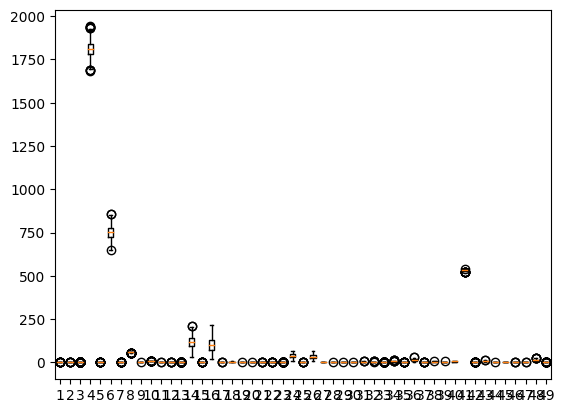

In [24]:
plt.boxplot(df)
plt.show()

### 군집분석은 데이터가 원형 데이터가 아닌 것 같아 kmeans로 하였습니다.

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,
                init='k-means++',
                max_iter=300,
                random_state=2).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [67]:
df['cluster']= kmeans.labels_
df_result = df.groupby(['Pass.Fail','cluster'])['X20'].count()
print(df_result)

Pass.Fail  cluster
0          0          433
           1          234
1          0           31
           1            9
Name: X20, dtype: int64


상관관계를 분석하기 위해서 seaborn에 heatmap으로 상관관계 그래프를 시각화하였습니다.

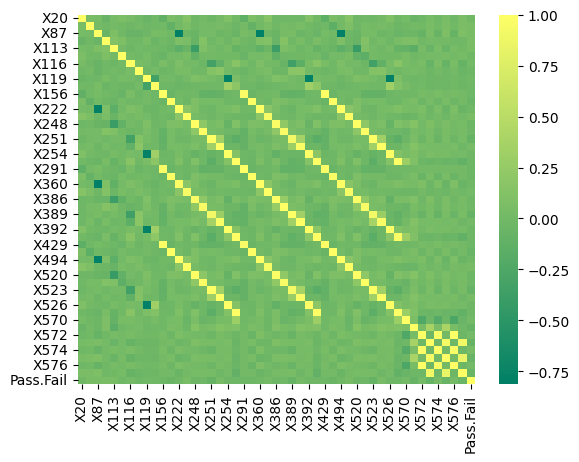

In [35]:
sns.heatmap(df.corr(), cmap='summer')
plt.show()

3. Training과 Testing으로 8:2로 파티셔닝
4.  Data Scaling은 필요 시 수행(MinMax)

In [26]:
df.describe()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,1.405721,2.401706,0.984292,1810.484466,0.946954,750.455689,0.990328,58.614216,0.970383,6.316749,...,6.384061,532.725906,2.095893,8.538104,0.286622,2.937570,0.088367,1.603150,13.690379,0.056577
std,0.013979,0.036585,0.008458,47.770170,0.010469,40.695843,0.002048,0.869904,0.008459,0.131250,...,1.857536,2.702700,0.273450,1.668205,0.088029,0.592265,0.026240,0.315175,3.885392,0.231196
min,1.340200,2.266300,0.951000,1681.642700,0.899100,647.883800,0.966200,54.005700,0.841100,5.720700,...,2.170000,521.205500,0.980200,4.940000,0.066700,1.565000,0.023000,0.918200,4.582000,0.000000
25%,1.397200,2.377450,0.983750,1779.708800,0.940450,726.666350,0.990100,58.144300,0.964800,6.255500,...,4.943150,531.009550,1.980900,7.365050,0.225600,2.558600,0.070450,1.380600,11.094300,0.000000
50%,1.406100,2.404400,0.987800,1809.830100,0.947200,752.359200,0.990600,58.656000,0.968500,6.319900,...,6.392600,532.576400,2.111400,8.440000,0.282400,2.916800,0.086100,1.582800,13.283000,0.000000
75%,1.414950,2.429200,0.989800,1839.906850,0.953200,777.396650,0.990900,59.169300,0.977900,6.379000,...,7.595700,534.580900,2.286850,9.775000,0.342350,3.366750,0.104450,1.832200,16.188100,0.000000
max,1.448300,2.492500,0.993200,1940.215000,0.974300,855.120100,0.992200,60.676200,0.982700,7.522000,...,11.144700,541.903600,2.675600,13.760000,0.526200,4.536100,0.161000,2.587400,26.222700,1.000000


X데이터에 들어가야할 값들의 차이와 범위가 커서 MinMaxScaler로 범위를 맞췄습니다.

In [31]:
df.max()

X20             1.4483
X86             2.4925
X87             0.9932
X88          1940.2150
X113            0.9743
X115          855.1201
X116            0.9922
X117           60.6762
X119            0.9827
X120            7.5220
X156            0.1099
X221            0.1879
X222            0.0115
X223          212.7645
X248            0.0457
X250          214.7760
X251            0.0021
X252            5.8064
X254            0.0511
X255            0.8278
X291            0.0430
X359            0.0565
X360            0.0047
X361           67.7753
X386            0.0190
X388           68.0278
X389            0.0007
X390            2.0536
X392            0.0166
X393            0.2994
X429            7.9161
X493            7.6479
X494            1.1760
X495           12.2628
X520            4.8211
X522           31.1314
X523            0.2192
X524           10.4816
X526            6.0739
X527           11.1447
X570          541.9036
X571            2.6756
X572           13.7600
X573       

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
z = df[['X88', 'X115', 'X117', 'X223', 'X250', 'X361', 'X388', 'X495', 'X522', 'X524', 'X527', 'X570', 'X572', 'X577']]
df['X88'] = scaler.fit_transform(df[['X88']])
df['X115'] = scaler.fit_transform(df[['X115']])
df['X117'] = scaler.fit_transform(df[['X117']])
df['X223'] = scaler.fit_transform(df[['X223']])
df['X250'] = scaler.fit_transform(df[['X250']])
df['X361'] = scaler.fit_transform(df[['X361']])
df['X388'] = scaler.fit_transform(df[['X388']])
df['X495'] = scaler.fit_transform(df[['X495']])
df['X522'] = scaler.fit_transform(df[['X522']])
df['X524'] = scaler.fit_transform(df[['X524']])
df['X527'] = scaler.fit_transform(df[['X527']])
df['X570'] = scaler.fit_transform(df[['X570']])
df['X572'] = scaler.fit_transform(df[['X572']])
df['X577'] = scaler.fit_transform(df[['X577']])

In [37]:
df.describe()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,1.405721,2.401706,0.984292,0.498281,0.946954,0.494951,0.990328,0.690880,0.970383,6.316749,...,0.469549,0.556592,2.095893,0.407948,0.286622,2.937570,0.088367,1.603150,0.420891,0.056577
std,0.013979,0.036585,0.008458,0.184746,0.010469,0.196374,0.002048,0.130411,0.008459,0.131250,...,0.206975,0.130577,0.273450,0.189139,0.088029,0.592265,0.026240,0.315175,0.179541,0.231196
min,1.340200,2.266300,0.951000,0.000000,0.899100,0.000000,0.966200,0.000000,0.841100,5.720700,...,0.000000,0.000000,0.980200,0.000000,0.066700,1.565000,0.023000,0.918200,0.000000,0.000000
25%,1.397200,2.377450,0.983750,0.379260,0.940450,0.380158,0.990100,0.620433,0.964800,6.255500,...,0.308996,0.473669,1.980900,0.274949,0.225600,2.558600,0.070450,1.380600,0.300928,0.000000
50%,1.406100,2.404400,0.987800,0.495751,0.947200,0.504137,0.990600,0.697144,0.968500,6.319900,...,0.470500,0.549369,2.111400,0.396825,0.282400,2.916800,0.086100,1.582800,0.402066,0.000000
75%,1.414950,2.429200,0.989800,0.612069,0.953200,0.624953,0.990900,0.774095,0.977900,6.379000,...,0.604555,0.646214,2.286850,0.548186,0.342350,3.366750,0.104450,1.832200,0.536309,0.000000
max,1.448300,2.492500,0.993200,1.000000,0.974300,1.000000,0.992200,1.000000,0.982700,7.522000,...,1.000000,1.000000,2.675600,1.000000,0.526200,4.536100,0.161000,2.587400,1.000000,1.000000


In [40]:
y = df['Pass.Fail']
X = df.iloc[:, :-1]
X

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X526,X527,X570,X571,X572,X573,X574,X575,X576,X577
1,1.3825,2.3754,0.9894,0.966862,0.9425,0.402284,0.9902,0.698943,0.9731,6.5061,...,0.8832,0.742866,0.667254,2.4335,0.111111,0.2653,2.0111,0.0772,1.1065,0.291964
3,1.4011,2.4004,0.9904,0.272474,0.9564,0.295329,0.9906,0.698268,0.9761,6.4935,...,0.7404,0.480963,0.452346,2.0253,0.497732,0.1738,2.8971,0.0525,1.7585,0.184888
4,1.3888,2.4530,0.9902,0.567508,0.9424,0.717592,0.9908,0.656637,0.9628,6.3551,...,2.2181,0.468484,0.522270,2.0275,0.441043,0.2224,3.1776,0.0706,1.6597,0.295175
5,1.3836,2.3745,0.9888,0.583929,0.9427,0.483530,0.9907,0.697144,0.9632,6.3186,...,2.9077,0.548988,0.628251,2.3236,0.450113,0.3201,2.2598,0.0899,1.6679,0.424825
6,1.4067,2.4676,0.9675,0.228193,0.9360,0.764295,0.9905,0.722180,0.9754,6.5398,...,0.5157,0.701450,1.000000,2.4229,0.174603,0.2027,2.2019,0.0597,1.1958,0.174786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,1.4259,2.3551,0.9914,0.632698,0.9392,0.862966,0.9895,0.895090,0.9602,6.5951,...,2.1539,0.505365,0.807847,2.1814,0.061224,0.3891,1.9077,0.1213,1.0187,0.612545
1555,1.3786,2.4925,0.9925,0.435952,0.9404,0.818416,0.9892,0.888914,0.9811,6.0213,...,0.2421,0.391489,0.767177,2.1754,0.265306,0.4146,2.7342,0.1430,1.3555,0.668971
1557,1.4184,2.3986,0.9899,0.598435,0.9514,0.553672,0.9899,0.387917,0.9638,6.5900,...,3.3132,0.575886,0.633918,1.5887,0.052154,0.2039,1.8036,0.0540,1.0106,0.381272
1559,1.3784,2.3499,0.9884,0.483257,0.9529,0.687685,0.9898,0.424211,0.9642,6.3838,...,1.9405,0.305046,0.366522,2.0831,0.212018,0.4774,2.2727,0.1495,1.2878,0.847306


In [41]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                                      test_size = 0.4,
                                                      random_state = 2)

In [42]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(424, 48) (283, 48)
(424,) (283,)


5. 최소 3개 이상의 모형을 피팅


gridsearchCV을 이용해서 KNN 모델과 로지스틱 회귀 모델, 의사결정나무 모델을 같이 사용하여 확인하고, 랜덤포래스트 모델을 사용해 결과값을 비교해볼 것입니다.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
lr = LogisticRegression()
dtm = DecisionTreeClassifier()
rfc = RandomForestClassifier()

param_knn = {
    'n_neighbors' : [3,5,7,9,11]
}
param_lr = {
    'max_iter' : [100,150,200]
}
param_dtm = {
    'min_samples_split' : [3,5,7,9,11],
    'min_samples_leaf' : [3,5,7,9,11],
    'max_depth': [5,7,9,11],
    'max_leaf_nodes' : [15,20,25]
}
param_rfc = {
    'n_estimators': [100,150,200],
    'min_samples_split' : [3,5,7,9,11],
    'min_samples_leaf' : [3,5,7,9,11],
    'max_depth': [5,7,9,11],
    'max_leaf_nodes' : [15,20,25]
}

grid_knn = GridSearchCV(knn, param_grid=param_knn, cv=2, verbose=2)
grid_lr = GridSearchCV(lr, param_grid=param_lr, cv=2, verbose=2)
grid_dtm = GridSearchCV(dtm, param_grid=param_dtm, cv=2, verbose=2)
grid_rfc = GridSearchCV(rfc, param_grid=param_rfc, cv=2, verbose=2)

grid_knn.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)
grid_dtm.fit(X_train, y_train)
grid_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_neighbors=9; total time=   0.0s
[CV] END ......................................n_neighbors=9; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.0s
Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END .......................................max_iter=100; total tim

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END max_depth=5, max_leaf_nodes=15, min_samples_leaf=3, min_samples_split=11; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=9; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=9; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=11; total t

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'max_leaf_nodes': [15, 20, 25],
                         'min_samples_leaf': [3, 5, 7, 9, 11],
                         'min_samples_split': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [55]:
print(grid_knn.best_params_)
print(grid_lr.best_params_)
print(grid_dtm.best_params_)
print(grid_rfc.best_params_)

{'n_neighbors': 3}
{'max_iter': 100}
{'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 3}
{'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


In [56]:
print(grid_knn.best_score_)
print(grid_lr.best_score_)
print(grid_dtm.best_score_)
print(grid_rfc.best_score_)

0.9504716981132075
0.9504716981132075
0.9504716981132075
0.9504716981132075


6. Test 데이터 셋을 통해 모델 평가
    1. Accuracy
    2. F-1 Score

In [57]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

pred_knn = grid_knn.predict(X_test)
pred_lr = grid_lr.predict(X_test)
pred_dtm = grid_dtm.predict(X_test)
pred_rfc = grid_rfc.predict(X_test)

knn_report = classification_report(y_test, pred_knn)
lr_report = classification_report(y_test, pred_lr)
dtm_report = classification_report(y_test, pred_dtm)
rfc_report = classification_report(y_test, pred_rfc)

print(knn_report)
print(lr_report)
print(dtm_report)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       264
           1       0.00      0.00      0.00        19

    accuracy                           0.93       283
   macro avg       0.47      0.50      0.48       283
weighted avg       0.87      0.93      0.90       283

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       264
           1       0.00      0.00      0.00        19

    accuracy                           0.93       283
   macro avg       0.47      0.50      0.48       283
weighted avg       0.87      0.93      0.90       283

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       264
           1       0.14      0.05      0.08        19

    accuracy                           0.92       283
   macro avg       0.54      0.51      0.52       283
weighted avg       0.88      0.92      0.90       283

              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

7. 최종 모델을 선택
    1. 가장 좋은 모델을 선택하시오.
    2. 최적의 파라미터를 선택하시오.

###분석을 한 결과 가장 좋은 모델은 의사결정나무 모델이 weighted avg가 가중 평균을 내서 계산하기 때문에 샘플 개수의 불균형을 고려해주는 수치라서 그 수치로 정확도(Accuracy)와 F1-score 모두 높은 편에 속하고 pass 값을 조금이라도 분류해낸 의사결정나무 모델로 선택하였습니다.
###최적의 파라미터는 의사결정나무 모델의 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 3}의 값이 가장 좋은 결과값의 파라미터였습니다.